**Nama : Firlli Yuzia Rahmanu**

**NIM : 210411100163**

**Kelas : PSD A**


# **DATA MATERNAL HEALTH RISK (risiko kesehatan ibu hamil)**



#**1. Deskripsi Dataset**



Data diambil dari https://archive.ics.uci.edu/dataset/863/maternal+health+risk

Tujuan Analisis Data : memprediksi resiko kesehatan ibu hamil
- Mengklasifikasikan individu berdasarkan karakteristik dan fitur-fitur tertentu dapat membantu dalam memprediksi tingkat risiko kesehatan ibu. Ini memungkinkan penyedia layanan kesehatan untuk lebih awal mengidentifikasi calon ibu yang mungkin menghadapi risiko kesehatan tertentu selama kehamilan.
- Dengan mengklasifikasikan calon ibu berdasarkan risiko, perawatan dan pemantauan yang lebih intensif dapat ditargetkan pada mereka yang memiliki risiko tinggi (high). Sebaliknya, mereka dengan risiko sedang (mid) dapat menerima perawatan yang cukup, mereka dengan risiko rendah (low) dapat menerima perawatan yang lebih sederhana.

Deskripsi data : ancaman terhadap kesehatan ibu hamil atau calon ibu yang sedang mengandung. Hal ini sering digunakan dalam konteks kesehatan ibu hamil untuk memahami dan mengatasi risiko-risiko yang dapat memengaruhi kesehatan ibu dan perkembangan janin. jumlah data resiko kesehatan ibu hamil ada 1014. untuk mendiagnosa resiko seorang ibu hamil diperlukan beberapa informasi mengenai kondisi ibu hamil.









Ada 6 Informasi kondisi ibu hamil yang dibutuhkan untuk mendiagnosa risiko seorang ibu hamil meliputi:
- Age : Usia dalam tahun ketika seorang wanita sedang hamil.

- cara mendapatkan data :

| Fitur  | Cara mendapatkan fitur    |
|--------|---------------------------|
| Age    | Instusi kesehatan         |
| John   | 32                        |
| Linda  | 25                        |




- SystolicBP : Nilai atas Tekanan Darah dalam mmHg (milimeter raksa) [cara mendapatkan data ini dengan menggunakan alat apa, bidan]
- DiastolicBP : Nilai bawah Tekanan Darah dalam mmHg (milimeter raksa)
- BS :	tingkat glukosa darah atau gula darah dalam bentuk konsentrasi molar, mmol/L.
- BodyTemp : Suhu Tubuh dalam Fahrenheit
- HeartRate	: Tingkat detak jantung istirahat normal dalam denyut per menit.
- RiskLevel : Tingkat Intensitas Risiko yang Diprediksi selama kehamilan








- Jumlah data terdapat 1014
- Jumlah fitur ada 7

    tipe data pada fitur :
    
    1. Age          : integer
    2. SystolicBP      : integer
    3. DiastolicBP    : integer
    4. BS            : float
    5. BodyTemp      : float
    6. HeartRate        : integer
    7. RiskLevel   : categorial

- Tidak ada missing value, tidak ada nilai yang hilang (NaN) dalam setiap kolom. Semua kolom memiliki nilai yang lengkap dan tidak ada yang perlu diproses lebih lanjut terkait dengan data yang hilang

- Terdapat 3 kelas di risk Level : high risk, mid risk, low risk
- Jumlah pada setiap kelas
  1. High risk (resiko tinggi) : 272
  2. Mid risk (resiko sedang) : 336
  3. Low risk (resiko rendah): 406

- Dalam konteks data tersebut, perbedaan antara kelas terbanyak (Low risk: 406 data) dan kelas yang meiliki jumlah sedikit (High risk: 272 data) tidak terlalu besar, meskipun ada perbedaan.Dengan mempertimbangkan perbedaan jumlah yang relatif kecil antara kelas-kelas dalam dataset yangtersebut, dapat dikatakan bahwa data tersebut cenderung lebih seimbang atau balence.

# **Penjelasan Detail Terkait fitur yang Ada:**
1. **Age**: Usia dalam tahun ketika seorang wanita sedang hamil.

Secara umum, kehamilan dikategorikan berisiko tinggi apabila ibu hamil berusia di atas 35 tahun. Kondisi ini dikenal dengan istilah kehamilan geriatri (hamil usia tua). Pasalnya, kehamilan geriatri dapat meningkatkan risiko terjadinya preeklamsia, persalinan macet, kelahiran prematur, hingga keguguran.


Selain itu, wanita yang hamil di bawah usia 17 tahun juga lebih berisiko mengalami komplikasi kehamilan, seperti maternal anemia, infeksi pada kehamilan, tekanan darah tinggi, dan lain sebagainya. Hal ini disebabkan karena pada usia yang masih muda tersebut, sistem reproduksi masih belum matang sepenuhnya sehingga belum mampu untuk mendukung kehamilan.


2. **SystolicBP** : Nilai atas Tekanan Darah dalam mmHg (milimeter raksa)

Systolic Blood Pressure atau tekanan darah sistolik diukur saat jantung berkontraksi dan memompa darah ke dalam arteri. Nilai ini mencerminkan tekanan darah pada saat puncak dalam siklus detak jantung.
Pengukuran tekanan darah biasanya dilakukan dalam bentuk dua angka, misalnya, dalam format 120/80 mmHg. Angka pertama (120 dalam contoh ini) menunjukkan tekanan sistolik, sedangkan angka kedua (80) menunjukkan tekanan diastolik.

Pada ibu hamil, perubahan tekanan darah bisa menjadi salah satu faktor risiko yang perlu dipantau secara teratur. Biasanya, selama kehamilan, terjadi peningkatan alami dalam tekanan darah, terutama pada trimester kedua. Namun, jika tekanan darah meningkat secara signifikan di luar batas normal, ini bisa menjadi tanda-tanda masalah kesehatan seperti pre-eclampsia atau hipertensi pada kehamilan, yang dapat berpotensi membahayakan ibu hamil dan janin.

Pengukuran tekanan darah yang konsisten tinggi atau di atas ambang batas tertentu (yang ditentukan oleh standar medis) selama kehamilan bisa menjadi indikasi adanya komplikasi atau risiko kesehatan yang perlu diwaspadai. Oleh karena itu, pemantauan dan pengelolaan tekanan darah ibu hamil sangat penting untuk mencegah komplikasi yang berpotensi membahayakan kesehatan ibu dan janin.

3. **DiastolicBP** : Nilai bawah Tekanan Darah dalam mmHg (milimeter raksa)

Diastolic blood pressure (tekanan darah diastolik) adalah nilai tekanan darah yang diukur ketika jantung sedang beristirahat atau mengisi kembali dengan darah di antara kontraksi-kontraksi (sistolik). Diastolic blood pressure (Diastolic BP) merupakan nilai tekanan darah pada fase relaksasi jantung, di mana pembuluh darah mengisi kembali dengan darah setelah pompaan darah oleh jantung.

Diastolic BP diukur dalam milimeter raksa (mmHg) dan merepresentasikan tekanan pada dinding pembuluh darah ketika jantung sedang beristirahat. Nilai normal diastolic blood pressure biasanya dianggap sekitar 80 mmHg atau lebih rendah. Namun, dalam konteks kehamilan, rentang normal tekanan darah dapat berbeda dan tergantung pada fase kehamilan.

Selama kehamilan, perubahan hormonal dan fisik dapat memengaruhi tekanan darah ibu hamil. Biasanya, tekanan darah sistolik (nilai atas) cenderung menurun sedikit pada pertengahan kehamilan dan kembali normal atau sedikit meningkat menjelang persalinan, sementara tekanan darah diastolik (nilai bawah) cenderung menurun secara bertahap hingga mencapai titik terendah pada pertengahan kehamilan.

Tingkat Diastolic BP yang tinggi pada ibu hamil dapat menandakan hipertensi atau tekanan darah tinggi, yang bisa menjadi risiko kesehatan serius baik bagi ibu maupun janin. Kondisi ini memerlukan pemantauan dan pengelolaan yang tepat oleh tenaga medis untuk mencegah komplikasi serius selama kehamilan.


- BS :	tingkat glukosa darah atau gula darah dalam bentuk konsentrasi molar, mmol/L.
- BodyTemp : Suhu Tubuh dalam Fahrenheit
- HeartRate	: Tingkat detak jantung istirahat normal dalam denyut per menit.
- RiskLevel : Tingkat Intensitas Risiko yang Diprediksi selama kehamilan


#**2. Penjelasan Setiap Program itu ada di dalam Code**

# - - -  **Connect To Google Drive** - - -


In [ ]:
# Connect To Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/psd/Maternal_Health_Risk

/content/drive/MyDrive/psd/Maternal_Health_Risk


# - - -  **IMPORT LIBRARY** - - -



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# - - -  **EKSPLORASI DATA** - - -

In [ ]:
#jumlah data
df = pd.read_csv('Maternal_Health_Risk.csv')
df.shape

(1014, 7)

In [ ]:
# mengakses tipe data dari setiap kolom dalam DataFrame.
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
# jumlah nilai-nilai yang hilang (NaN atau null) dalam setiap kolom DataFrame.
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

 tidak ada nilai yang hilang (NaN) dalam setiap kolom. Semua kolom memiliki nilai yang lengkap dan tidak ada yang perlu diproses lebih lanjut terkait dengan data yang hilang.

In [ ]:
# untuk mengelompokkan kolom-kolom berdasarkan karakteristik tertentu
# seperti kolom-kolom kategori (ca_val) yang mungkin berisi variabel kategori atau tipe data terbatas, dan kolom-kolom kontinu (co_val) yang mungkin berisi variabel numerik atau tipe data beragam.
ca_val=[]
co_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)

In [ ]:
#Categorical Data
#data yang bersifat kategorikal
ca_val

['BodyTemp', 'RiskLevel']

In [ ]:
# berisi semua nilai yang ada dalam kolom 'BodyTemp'
df['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [ ]:
# berisi semua nilai yang ada dalam kolom 'RiskLevel'
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
# data yang bersifat numerik
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [ ]:
# # berisi semua nilai yang ada dalam kolom 'Age'
df['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [ ]:
# berisi semua nilai yang ada dalam kolom 'SystolicBP'
df['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [ ]:
# berisi semua nilai yang ada dalam kolom 'DiastolicBP'
df['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

In [ ]:
# berisi semua nilai yang ada dalam kolom 'BS'
df['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [ ]:
# berisi semua nilai yang ada dalam kolom 'HeartRate'
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [ ]:
# Mengubah label menjadi nilai numerik
# Tujuan: Memfasilitasi analisis data atau pembuatan model dengan menggunakan kolom 'RiskLevel'
# Kolom 'RiskLevel' awalnya memiliki label kategori ('low risk', 'mid risk', 'high risk')
# Kode ini mengganti label tersebut menjadi nilai numerik (0, 1, 2) secara berurutan
# Ini memudahkan penggunaan kolom 'RiskLevel' dalam analisis atau pemodelan karena nilai numerik bisa diproses lebih mudah
df['RiskLevel'].replace(['low risk', 'mid risk', 'high risk'], [0, 1, 2], inplace=True)

df  # Menampilkan DataFrame setelah transformasi kolom 'RiskLevel'


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [ ]:
# Menampilkan jumlah kemunculan setiap nilai unik dalam kolom 'RiskLevel' dari DataFrame
# Fungsi 'value_counts()' digunakan untuk menghitung dan menampilkan jumlah kemunculan setiap nilai unik
# Kolom 'RiskLevel' mungkin memiliki beberapa nilai seperti 'low risk', 'mid risk', 'high risk'
# Kode ini membantu untuk memahami distribusi nilai dalam kolom tersebut
df['RiskLevel'].value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

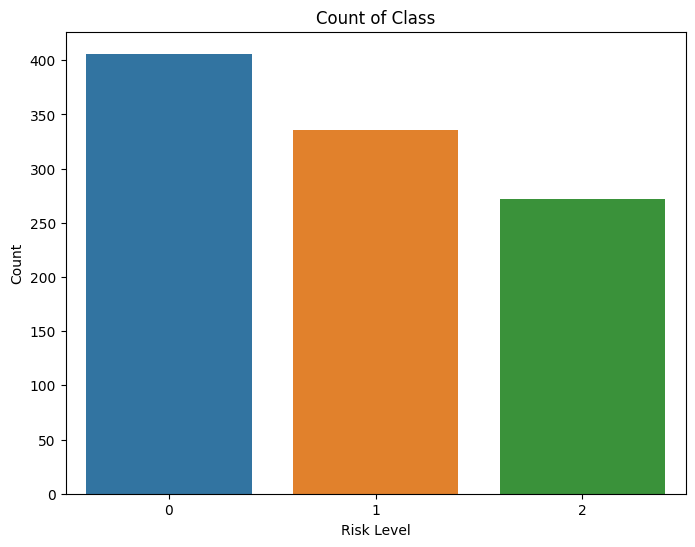

In [ ]:
# Membuat plot countplot untuk kolom 'RiskLevel' dalam DataFrame 'df'
# plt.figure(figsize=(8, 6)) digunakan untuk menentukan ukuran plot (lebar: 8 inch, tinggi: 6 inch)
# sns.countplot(data=df, x='RiskLevel') membuat plot countplot menggunakan library seaborn (sns)
# dengan sumbu x adalah 'RiskLevel' dari DataFrame 'df'
# Plot ini akan menunjukkan jumlah kemunculan setiap nilai dalam kolom 'RiskLevel'
# plt.title('Count of Class') menambahkan judul ke plot
# plt.xlabel('Risk Level') dan plt.ylabel('Count') menambahkan label sumbu x dan y
# plt.show() menampilkan plot countplot yang telah dibuat
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RiskLevel')
plt.title('Count of Class')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

perbedaan antara kelas terbanyak (Low risk: 406 data) dan kelas terdikit (High risk: 272 data) tidak terlalu besar, meskipun ada perbedaan.Dengan mempertimbangkan perbedaan jumlah yang relatif kecil antara kelas-kelas dalam dataset tersebut, dapat dikatakan bahwa data tersebut cenderung lebih seimbang atau balence.

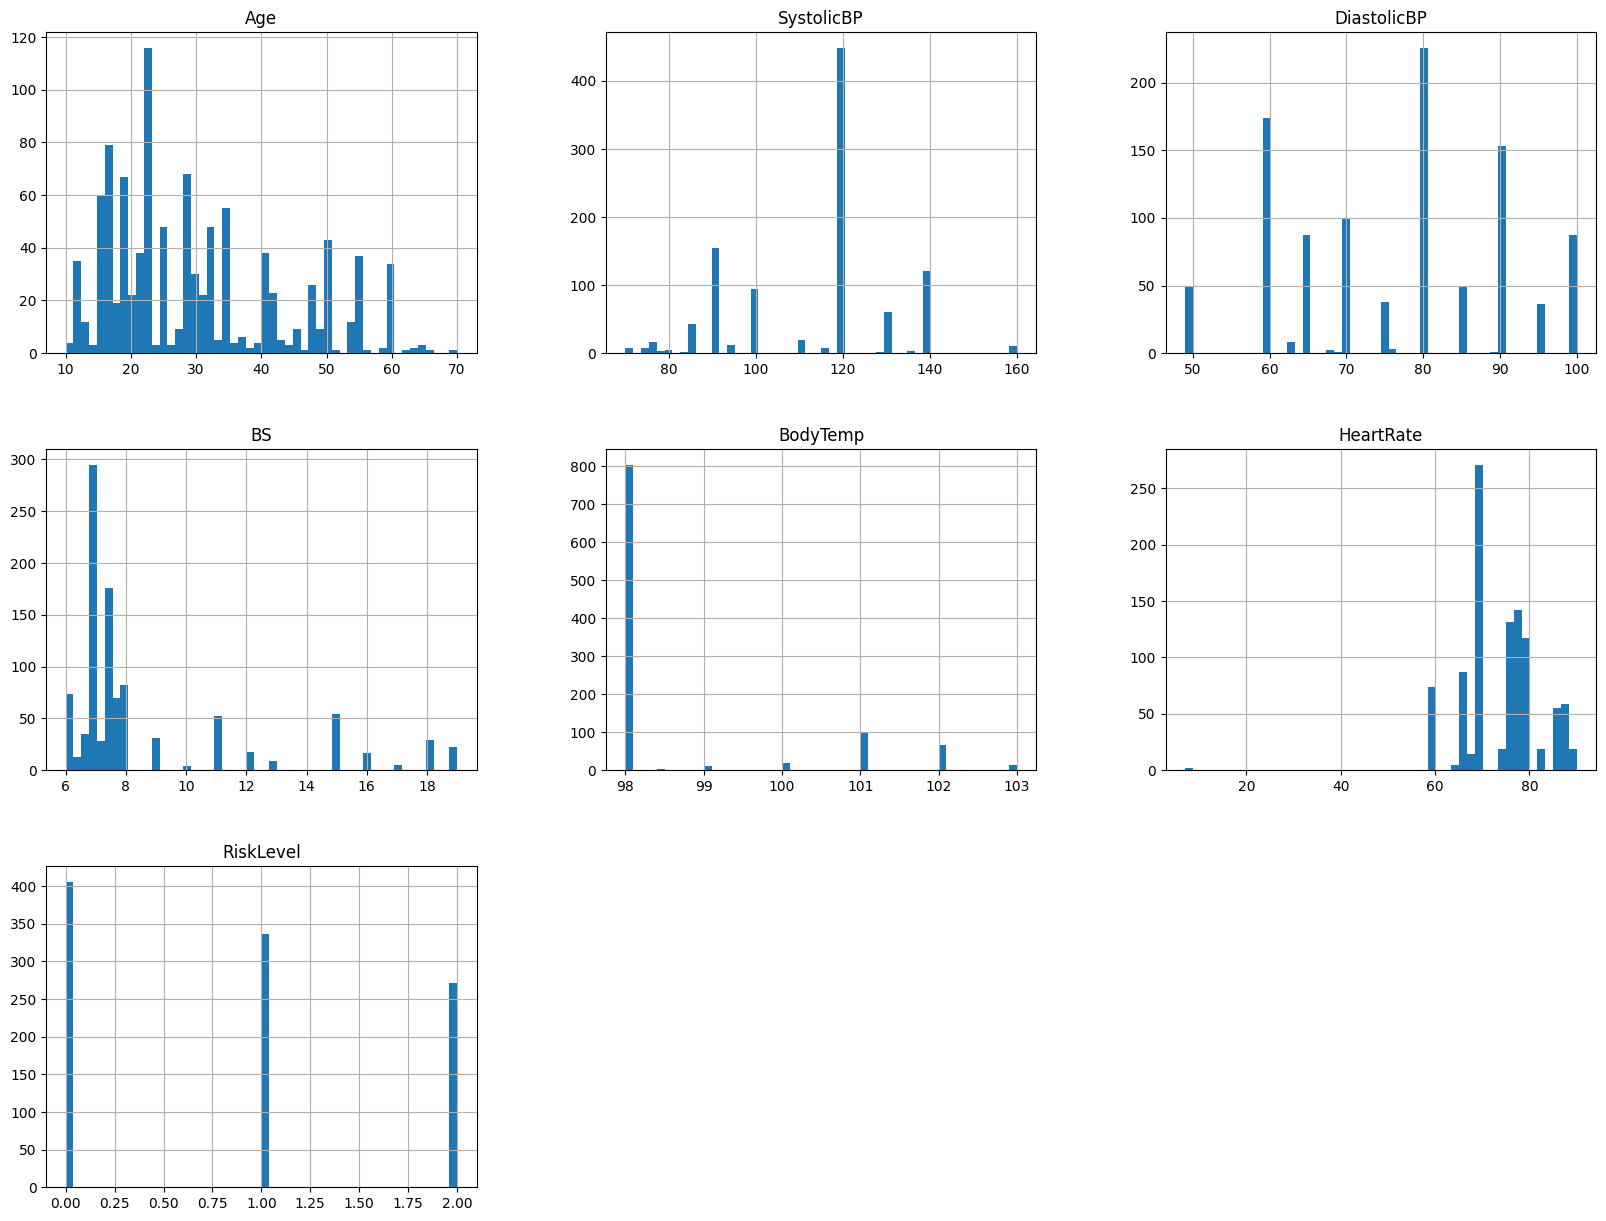

In [ ]:
# histogram
# Mengimpor library matplotlib.pyplot untuk visualisasi
import matplotlib.pyplot as plt

# df.hist(bins=50, figsize=(20, 15)) digunakan untuk membuat histogram untuk setiap kolom dalam DataFrame 'df'
# bins=50 menentukan jumlah bin (batang) pada histogram
# figsize=(20, 15) menentukan ukuran gambar plot histogram (lebar: 20 inch, tinggi: 15 inch)
df.hist(bins=50, figsize=(20, 15))

# plt.show() digunakan untuk menampilkan plot histogram yang telah dibuat
plt.show()

In [ ]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
# X adalah subset dari DataFrame df yang terdiri dari semua kolom kecuali kolom terakhir ('RiskLevel')
# y adalah subset dari DataFrame df yang hanya terdiri dari kolom 'RiskLevel' sebagai target
# X.shape digunakan untuk menampilkan dimensi dari dataset fitur (jumlah baris, jumlah kolom)
X = df[df.columns[:-1]]  # Memilih semua kolom kecuali kolom terakhir
y = df['RiskLevel']  # Memilih kolom 'RiskLevel' sebagai target

In [ ]:
# menampilkan lima baris pertama dari variabel X yang Memilih semua kolom kecuali kolom "RiskLevel"
X.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [ ]:
# menampilkan lima baris pertama dari variabel y yang Memilih kolom "RiskLevel"
y.head(5)

0    2
1    2
2    2
3    2
4    0
Name: RiskLevel, dtype: int64

# - - -  **SPLIT DATA** - - -
Fungsinya untuk membagi dataset menjadi data pelatihan dan pengujian.

In [ ]:
# Split Dataset
# Nilai test_size adalah 0.3, yang artinya dataset akan dibagi menjadi data pelatihan (70%) dan data pengujian (30%).
# Variabel X_train, X_test, y_train, y_test akan menampung data hasil pembagian.
# X adalah variabel independen (fitur) yang akan digunakan untuk melatih model.
# y adalah variabel dependen (target) yang akan diprediksi oleh model.
# Fungsi train_test_split dari sklearn.model_selection digunakan untuk membagi dataset menjadi data pelatihan dan pengujian.
# Parameter test_size=0.3 menunjukkan proporsi data pengujian yang diinginkan (30% dari dataset).
# Parameter random_state=42 digunakan untuk mengatur seed agar hasil pembagian data dapat direproduksi.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Menampilkan dimensi (bentuk) dari data latih (Training) dan data uji (Testing) untuk fitur (X) dan target (y)
# Menggunakan fungsi shape untuk menunjukkan jumlah baris dan kolom dari setiap data

print(f'Training Shape x:',X_train.shape)  # Menampilkan bentuk data latih untuk fitur (X)
print(f'Testing Shape x:',X_test.shape)    # Menampilkan bentuk data uji untuk fitur (X)
print('*****___________*****___________*****')  # Membuat pemisah visual antara informasi data latih dan data uji

print(f'Training Shape y:',X.shape)       # Menampilkan bentuk data latih untuk target (y)
print(f'Testing Shape y:',y.shape)        # Menampilkan bentuk data uji untuk target (y)

Training Shape x: (709, 6)
Testing Shape x: (305, 6)
*****___________*****___________*****
Training Shape y: (1014, 6)
Testing Shape y: (1014,)



# **3. Penjelasan Preprocessing dan Model**

# - - -  **PREPROCESSING** - - -

pada data berikut adalah :
- normalisasi


**NORMALISASI**

- Normalisasi adalah proses transformasi data sehingga nilainya berada dalam rentang tertentu atau memiliki distribusi yang sesuai untuk analisis atau pemodelan yang lebih baik. Normalisasi dapat menggunakan berbagai metode, salah satunya adalah Normalisasi Z-Score.

- Normalisasi Z-Score adalah salah satu teknik normalisasi yang menggunakan nilai rata-rata dan deviasi standar dari data untuk mengubah nilai-nilai tersebut ke dalam distribusi standar (distribusi normal dengan mean 0 dan standar deviasi 1).


*normalisasi yang digunakan disini adalah* **Z-Score**

Rumus Normalisasi Z-Score:

$ Z = \frac{{X - \mu}}{{\sigma}} $

- $Z$ adalah skor Z (Z-score).
- $X$ adalah nilai yang akan dinormalisasi.
- $\mu\$ adalah rerata (mean) dari sampel.

- $\sigma\$ adalah deviasi standar (standard deviation) dari sampel.

In [ ]:
# StandardScaler adalah sebuah metode untuk melakukan normalisasi data dengan skala Z-score.
# Normalisasi Z-score mengubah data sehingga memiliki rata-rata nol dan standar deviasi satu.
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Membuat objek StandardScaler
ss = StandardScaler()

# Melatih (fit) StandardScaler pada data X_train
ss.fit(X_train)

# Mengubah (transform) data X_train sesuai dengan skala yang telah dipelajari oleh StandardScaler
X_train_scaled = ss.transform(X_train)

# Langkah yang sama dengan pendekatan yang lebih singkat:
# ss_X_train = ss.fit_transform(X_train)
# ss_X_test = ss.fit_transform(X_test)

# Mengaplikasikan transformasi yang sama ke data test (X_test) dengan skala yang sama dari X_train
# Penting untuk menggunakan skala yang sama untuk data train dan test untuk memastikan konsistensi dalam analisis
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)


In [ ]:
from google.colab import files

# Membuat DataFrame baru (df_normalized) dari data yang telah dinormalisasi (ss_X_train) dengan nama kolom yang sesuai dengan X_train.columns
df_normalized = pd.DataFrame(data=ss_X_train, columns=X_train.columns)  # Ganti X_train.columns sesuai dengan kolom yang sesuai

# Menyimpan DataFrame ke dalam file CSV dengan nama 'hasil_sudah_normalisasi.csv' tanpa menyertakan indeks
df_normalized.to_csv('hasil_sudah_normalisasi_maternal.csv', index=False)

# Mengunduh file CSV ('hasil_sudah_normalisasi.csv') yang telah disimpan
files.download('hasil_sudah_normalisasi_maternal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# menyimpan preprocessing
# Mengimpor modul pickle yang memungkinkan penyimpanan objek Python ke dalam file
import pickle

# Path atau lokasi file di mana model akan disimpan
file = '/content/drive/MyDrive/psd/Maternal_Health_Risk/normalisasi_ini.pkl'

# Membuka file dalam mode write binary ('wb') untuk menyimpan model
# 'ss' adalah objek yang akan disimpan (model normalisasi atau objek lainnya)
# pickle.dump(ss, file) digunakan untuk menyimpan objek 'ss' ke dalam file menggunakan pickle
with open(file, 'wb') as file:
    pickle.dump(ss, file)


# - - -  **MODEL** - - -

**Perbandingan Beberapa Model dengan akurasi**

- **SVM**

In [ ]:
# SVM
# Import modul SVC (Support Vector Classifier) dari pustaka Scikit-learn
from sklearn.svm import SVC

# Membuat model SVM dengan parameter tertentu
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)

# Melatih model menggunakan data X_train dan y_train
svm.fit(X_train, y_train)

# Menampilkan akurasi pada data latih (train) dan data uji (test)
print("Train accuracy:", svm.score(X_train, y_train))
print("Test accuracy:", svm.score(X_test, y_test))

# Memprediksi nilai target (y) menggunakan data uji (X_test)
y_pred = svm.predict(X_test)

# Menampilkan prediksi yang dihasilkan oleh model
print(y_pred)

# Menghitung dan menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:', cm)

# Menghitung dan menampilkan akurasi dari model SVM
print(f'Accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

# Menampilkan precision, recall, f1-score, dan support dari model SVM
print(classification_report(y_test, svm.predict(X_test)))


Train accuracy: 0.846262341325811
Test accuracy: 0.7180327868852459
[1 2 2 0 1 1 1 1 1 2 2 0 0 2 1 1 2 0 0 1 1 1 1 2 0 1 2 1 0 0 1 2 0 0 0 2 2
 1 0 2 0 1 2 2 0 1 2 1 0 0 0 0 0 0 1 1 2 0 0 0 0 1 1 1 1 2 1 2 1 1 2 0 0 1
 0 2 0 1 2 0 0 0 0 0 1 0 0 1 2 1 0 2 0 2 1 0 1 0 2 1 0 2 0 0 0 1 0 0 0 1 1
 1 0 2 1 0 0 2 0 2 1 0 0 1 2 2 1 0 1 0 0 0 1 1 0 0 2 1 0 1 2 0 2 2 0 0 2 1
 0 1 0 0 0 1 2 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 2 0 1 1 0 2 1 0 0 0 2 1 0 0 2
 0 2 0 0 0 1 0 1 1 0 0 1 2 0 0 1 1 2 2 1 0 1 2 1 1 2 1 0 0 0 2 1 0 0 0 2 2
 1 0 0 1 1 0 2 0 0 0 1 0 1 1 0 0 1 2 0 0 0 0 1 2 0 0 0 0 2 0 1 0 2 0 0 2 2
 0 0 1 0 0 1 2 1 0 2 1 0 2 0 1 2 0 0 0 0 0 0 2 0 2 1 0 2 0 1 1 0 1 0 0 0 2
 2 0 1 0 2 2 1 2 0]
Confusion Matrix: [[96 18  3]
 [39 65  8]
 [10  8 58]]
Accuracy: 71.80327868852459 %
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       117
           1       0.71      0.58      0.64       112
           2       0.84      0.76      0.80        76

    accur

- **Decision Tree**

In [ ]:
# Decision Tree
from sklearn import tree  # Mengimpor modul Decision Tree dari library scikit-learn
decision_tree = tree.DecisionTreeClassifier(criterion='gini')  # Membuat objek Decision Tree Classifier dengan kriteria 'gini'
decision_tree.fit(X_train, y_train)  # Melatih model Decision Tree menggunakan data training (X_train dan y_train)

# Menampilkan akurasi model pada data training dan data testing
print("Train accuracy:", decision_tree.score(X_train, y_train))  # Menampilkan akurasi model pada data training
print("Test accuracy:", decision_tree.score(X_test, y_test))  # Menampilkan akurasi model pada data testing

y_pred = decision_tree.predict(X_test)  # Memprediksi label dari data testing menggunakan model Decision Tree
print(y_pred)  # Menampilkan hasil prediksi

# Menghitung dan menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Menghitung confusion matrix dari hasil prediksi dan nilai sebenarnya
print(f'CM:', cm)  # Menampilkan confusion matrix
print(f'Accuracy:', accuracy_score(y_test, y_pred) * 100, '%')  # Menampilkan akurasi dari hasil prediksi

# Menampilkan precision, recall, f1-score, dan support
print(classification_report(y_test, decision_tree.predict(X_test)))  # Menampilkan laporan klasifikasi berdasarkan hasil prediksi

Train accuracy: 0.9464033850493653
Test accuracy: 0.8
[1 2 2 0 0 1 1 1 1 0 2 1 1 2 1 1 2 0 0 1 1 1 2 2 0 1 2 0 0 0 1 2 0 1 0 2 2
 0 0 2 2 0 2 2 0 1 2 1 0 0 1 0 0 1 1 1 2 1 0 1 0 1 1 0 0 2 1 2 1 2 2 2 1 1
 1 2 0 1 2 0 0 1 0 0 1 0 0 1 2 1 1 2 0 2 1 0 1 0 2 1 0 2 0 0 1 1 0 1 0 1 1
 1 0 2 1 0 0 2 1 2 1 0 0 1 2 2 1 1 1 1 0 0 1 1 0 0 2 1 0 1 2 1 2 2 0 0 2 0
 0 1 0 1 0 1 2 1 0 1 0 2 0 0 0 1 0 1 1 1 0 0 2 0 1 0 1 2 1 1 0 0 2 1 0 2 2
 0 2 0 1 0 1 1 1 1 0 1 1 2 0 1 1 1 2 2 1 1 1 2 1 1 2 1 0 0 1 2 1 2 0 0 2 2
 1 1 1 1 1 0 2 1 0 1 1 0 1 1 0 0 1 2 0 0 0 0 1 2 0 0 0 0 2 2 2 1 2 0 0 2 2
 2 1 1 1 1 1 2 1 1 2 0 2 2 0 1 2 2 0 0 2 0 0 0 0 2 2 1 2 0 1 1 2 1 0 0 0 2
 2 0 1 0 2 2 1 2 1]
CM: [[88 25  4]
 [16 87  9]
 [ 1  6 69]]
Accuracy: 80.0 %
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       117
           1       0.74      0.78      0.76       112
           2       0.84      0.91      0.87        76

    accuracy                           0.80       

- **Gaussian Naive Bayes**

In [ ]:
# Gaussian Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB

# Membuat model Naive Bayes dengan tipe Gaussian
nb = GaussianNB()

# Melatih model dengan data training (X_train dan y_train)
nb.fit(X_train , y_train)

# Mencetak akurasi model pada data training dan data test
print("Train accuracy:", nb.score(X_train, y_train))
print("Test accuracy:", nb.score(X_test, y_test))

# Melakukan prediksi menggunakan data test
y_pred = nb.predict(X_test)

# Mencetak hasil prediksi
print(y_pred)

# Menghitung confusion matrix antara hasil prediksi (y_pred) dan nilai sebenarnya (y_test)
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:', cm)

# Menghitung dan mencetak tingkat akurasi dari hasil prediksi
print(f'Accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

# Mencetak laporan klasifikasi yang berisi precision, recall, f1-score, dan support
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy: 0.61212976022567
Test accuracy: 0.5639344262295082
[0 2 2 0 1 1 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0 2 0 0 0 1 2 0 0 0 2 2
 0 0 2 2 1 2 0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 2 2 0
 0 2 0 2 2 0 0 0 0 0 0 0 0 1 2 0 1 1 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 2 2 1 0 2 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 1 0 2 0 0 2 0
 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 1 0 0 0 1 0 0 2 2
 0 2 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 0 0 1 0 0 0 0 2 2
 0 0 0 0 0 0 2 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 2
 2 0 0 0 0 0 2 0 0 1 0 0 1 0 0 2 0 0 0 2 0 0 0 0 2 1 0 2 0 2 0 1 0 0 0 0 2
 2 0 0 0 2 0 0 2 0]
Confusion Matrix: [[109   5   3]
 [ 85  17  10]
 [ 19  11  46]]
Accuracy: 56.393442622950815 %
              precision    recall  f1-score   support

           0       0.51      0.93      0.66       117
           1       0.52      0.15      0.23       112
           2       0.78      0.61      0.68        76



- **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Regresi Logistik
model = LogisticRegression()

# Melatih model menggunakan data X_train dan y_train
model.fit(X_train, y_train)

# Memprediksi nilai target menggunakan data X_test
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

# Mencetak nilai Akurasi (Accuracy Score) dari prediksi model terhadap data y_test
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.6327868852459017


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- **KNN**

In [ ]:
# Menggunakan algoritma K-Nearest Neighbors untuk klasifikasi dengan variasi nilai k
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier dari scikit-learn
from sklearn.metrics import accuracy_score  # Import accuracy_score untuk mengukur akurasi

akurasi_terbaik = 0  # Inisialisasi variabel untuk menyimpan akurasi terbaik
k_terbaik = 0  # Inisialisasi variabel untuk menyimpan nilai k terbaik

# Loop untuk mencoba berbagai nilai k dari 1 hingga 20
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)  # Membuat model KNN dengan nilai k tertentu
    model.fit(X_train, y_train)  # Melatih model dengan data latih
    hasil_prediksi = model.predict(X_test)  # Melakukan prediksi dengan data uji

    akurasi = accuracy_score(y_test, hasil_prediksi)  # Menghitung akurasi prediksi
    print(f"k = {k}, Skor Akurasi: {akurasi}")  # Menampilkan skor akurasi untuk setiap nilai k

    # Memeriksa jika akurasi terbaik diperbarui, jika ya, perbarui nilai k_terbaik dan akurasi_terbaik
    if akurasi > akurasi_terbaik:
        akurasi_terbaik = akurasi
        k_terbaik = k

# Menampilkan nilai k terbaik dan skor akurasi terbaik yang telah ditemukan
print(f"k Terbaik: {k_terbaik} dengan Skor Akurasi: {akurasi_terbaik}")

k = 1, Skor Akurasi: 0.7836065573770492
k = 2, Skor Akurasi: 0.6852459016393443
k = 3, Skor Akurasi: 0.6688524590163935
k = 4, Skor Akurasi: 0.6262295081967213
k = 5, Skor Akurasi: 0.6
k = 6, Skor Akurasi: 0.6
k = 7, Skor Akurasi: 0.6295081967213115
k = 8, Skor Akurasi: 0.6065573770491803
k = 9, Skor Akurasi: 0.580327868852459
k = 10, Skor Akurasi: 0.6098360655737705
k = 11, Skor Akurasi: 0.6098360655737705
k = 12, Skor Akurasi: 0.6163934426229508
k = 13, Skor Akurasi: 0.6131147540983607
k = 14, Skor Akurasi: 0.6032786885245902
k = 15, Skor Akurasi: 0.5967213114754099
k = 16, Skor Akurasi: 0.6065573770491803
k = 17, Skor Akurasi: 0.6098360655737705
k = 18, Skor Akurasi: 0.6098360655737705
k = 19, Skor Akurasi: 0.5967213114754099
k = 20, Skor Akurasi: 0.5967213114754099
k Terbaik: 1 dengan Skor Akurasi: 0.7836065573770492


- **Random Forest**

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Membuat model RandomForestClassifier
random_forest = RandomForestClassifier()

# Melatih model menggunakan data X_train dan y_train
random_forest.fit(X_train, y_train)

# Menampilkan akurasi model pada data latih (train) dan data uji (test)
print("Train accuracy:", random_forest.score(X_train, y_train))
print("Test accuracy:", random_forest.score(X_test, y_test))

# Melakukan prediksi terhadap data uji (test)
y_pred = random_forest.predict(X_test)

# Menampilkan hasil prediksi
print(y_pred)

# Menghitung confusion matrix untuk mengevaluasi performa model
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:', cm)

# Menghitung dan menampilkan akurasi model
print(f'Accuracy:', accuracy_score(y_test, y_pred) * 100, '%')

# Menampilkan laporan klasifikasi yang berisi precision, recall, dan f1-score
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.9464033850493653
Test accuracy: 0.8032786885245902
[1 2 2 0 0 1 1 1 1 0 2 1 1 2 1 1 2 0 0 1 1 1 2 2 0 1 2 1 0 0 1 2 0 1 0 2 2
 1 0 2 2 0 2 2 0 1 2 1 0 0 1 0 0 1 1 1 2 0 0 1 0 1 1 1 0 2 1 2 1 2 2 2 1 1
 1 2 0 1 2 0 0 1 0 1 1 0 0 1 2 1 1 2 0 2 1 0 1 0 2 1 0 2 0 0 1 1 0 1 0 1 1
 1 0 2 1 0 0 2 0 2 1 0 0 1 2 2 1 1 1 1 0 0 1 1 0 0 2 1 0 1 2 1 2 2 0 0 2 0
 0 1 0 1 0 1 2 1 0 1 0 2 0 0 0 1 0 1 1 1 0 0 2 0 1 0 1 2 1 0 0 0 2 1 0 2 2
 0 2 0 0 0 1 1 1 1 0 0 1 2 0 1 1 1 2 2 1 1 1 2 1 1 2 1 0 0 1 2 1 2 0 0 2 2
 1 1 1 1 1 0 2 1 0 1 1 0 1 1 0 0 1 2 0 0 0 0 1 2 0 0 0 0 2 2 2 1 2 0 0 2 2
 2 1 1 1 1 1 2 1 1 2 0 2 2 0 1 2 2 0 0 2 0 0 0 0 2 2 0 2 0 1 1 2 1 0 0 0 2
 2 0 1 0 2 2 1 2 1]
Confusion Matrix: [[89 24  4]
 [16 87  9]
 [ 2  5 69]]
Accuracy: 80.32786885245902 %
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       117
           1       0.75      0.78      0.76       112
           2       0.84      0.91      0.87        76

    accu

**MODEL TERBAIK YANG DIGUNAKAN ADALAH RANDOM FOREST**

Model Random Forest adalah salah satu algoritma supervised learning dalam machine learning yang dapat digunakan untuk tugas klasifikasi dan regresi. Algoritma ini berada dalam kelompok ensemble learning yang menggabungkan beberapa pohon keputusan (decision trees) untuk membuat prediksi yang lebih akurat.

Berikut adalah beberapa poin penjelasan tentang Model Random Forest:

- Supervised Learning : model atau algoritma belajar dari data yang telah ditandai atau berlabel. Dalam supervised learning, model dilatih menggunakan dataset yang terdiri dari pasangan input dan output yang telah diberi label.

- Ensemble Learning: Random Forest merupakan teknik ensemble learning yang menggabungkan hasil dari beberapa model (pohon keputusan) untuk membuat keputusan akhir. Hal ini membantu dalam mengatasi masalah overfitting (pemodelan yang terlalu pas dengan data latih namun tidak umum).

- Pohon Keputusan: Setiap pohon keputusan dalam Random Forest merupakan model yang terdiri dari serangkaian keputusan berhierarki yang dibuat berdasarkan fitur-fitur dari data latih. Pohon-pohon ini bergantung satu sama lain dan melakukan prediksi secara kolektif.

- Randomization: Keunikan dari Random Forest adalah dalam proses pembentukan pohon-pohon keputusan yang dilakukan secara acak. Proses ini melibatkan pemilihan acak dari fitur-fitur untuk setiap pohon dan pembagian acak dari sampel data untuk setiap pohon.

- Model Random Forest memiliki kelebihan dalam menangani data yang kompleks, fitur-fitur yang tidak relevan, serta toleran terhadap overfitting. Selain itu, model ini dapat memberikan perkiraan pentingnya (importance) dari masing-masing fitur dalam prediksi.

**Konsep Random Forest:**

1. Bootstrap Aggregating (Bagging):
- Langkah pertama adalah mengambil sampel acak dari dataset dengan penggantian (bootstrap) untuk membuat beberapa dataset baru.
- Setiap dataset baru ini digunakan untuk melatih pohon keputusan yang berbeda.
2. Decision Trees (Pohon Keputusan):
- Setiap dataset hasil dari bagging digunakan untuk membuat pohon keputusan secara independen.
- Masing-masing pohon memilih fitur terbaik untuk membagi data menjadi subset yang semakin murni.
3. Ensemble dan Prediksi:
- Ketika ada data baru yang perlu diprediksi, setiap pohon memberikan hasil prediksi.
- Dalam kasus klasifikasi, hasil mayoritas dari semua prediksi pohon diambil sebagai prediksi akhir.

**Rumus Random Forest Classifier:**

$\hat{Y} = \frac{1}{N} \sum_{i=1}^{N} f_i(X)$

di mana:

$\hat{Y}$ adalah prediksi akhir,

$N$ adalah jumlah pohon keputusan dalam ensemble,

$X$ adalah prediksi yang dihasilkan oleh pohon keputusan ke-
i.


**Contoh Penghitungan Random Forest pada Kasus Klasifikasi:**

Misalkan kita memiliki ensemble Random Forest dengan 3 pohon keputusan. Setiap pohon menghasilkan prediksi terhadap sebuah sampel data sebagai berikut:

Pohon 1: Prediksi kelas A

Pohon 2: Prediksi kelas B

Pohon 3: Prediksi kelas A

Dalam kasus ini, kita mengambil hasil mayoritas prediksi:

Kelas A muncul 2 kali.

Kelas B muncul 1 kali.

Maka, hasil prediksi akhir dari ensemble Random Forest adalah kelas A karena memiliki jumlah prediksi terbanyak.


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import library untuk RandomForestClassifier
from sklearn.metrics import accuracy_score  # Import library untuk mengukur akurasi
import pickle  # Import library untuk penyimpanan model

akurasi_terbaik_rf = 0  # Inisialisasi variabel untuk menyimpan nilai akurasi tertinggi
random_state_terbaik_rf = 0  # Inisialisasi variabel untuk menyimpan nilai random_state terbaik
model_terbaik = None  # Inisialisasi variabel untuk menyimpan model terbaik

# Loop untuk mencari model dengan random_state terbaik dari 1 hingga 20
for random_state_rf in range(1, 21):
    # Membuat model RandomForestClassifier dengan random_state tertentu
    model2 = RandomForestClassifier(random_state=random_state_rf)

    # Melatih model menggunakan data X_train dan y_train
    model2.fit(X_train, y_train)

    # Melakukan prediksi menggunakan data X_test
    hasil_prediksi_rf = model2.predict(X_test)

    # Mengukur akurasi dari model yang telah dilatih
    akurasi_rf = accuracy_score(y_test, hasil_prediksi_rf)
    print(f"random_state = {random_state_rf}, Skor Akurasi: {akurasi_rf}")

    # Memilih model dengan akurasi tertinggi sebagai model terbaik
    if akurasi_rf > akurasi_terbaik_rf:
        akurasi_terbaik_rf = akurasi_rf
        random_state_terbaik_rf = random_state_rf
        model_terbaik = model2  # Simpan model dengan akurasi tertinggi

# Menampilkan nilai random_state terbaik dan akurasi tertinggi yang diperoleh
print(f"random_state Terbaik: {random_state_terbaik_rf} dengan Skor Akurasi: {akurasi_terbaik_rf}")

# Simpan model dengan akurasi tertinggi ke dalam file 'best_model.pkl'
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_terbaik, file)


random_state = 1, Skor Akurasi: 0.8065573770491803
random_state = 2, Skor Akurasi: 0.7967213114754098
random_state = 3, Skor Akurasi: 0.8065573770491803
random_state = 4, Skor Akurasi: 0.8098360655737705
random_state = 5, Skor Akurasi: 0.8098360655737705
random_state = 6, Skor Akurasi: 0.7934426229508197
random_state = 7, Skor Akurasi: 0.8032786885245902
random_state = 8, Skor Akurasi: 0.8032786885245902
random_state = 9, Skor Akurasi: 0.7967213114754098
random_state = 10, Skor Akurasi: 0.8
random_state = 11, Skor Akurasi: 0.7967213114754098
random_state = 12, Skor Akurasi: 0.7967213114754098
random_state = 13, Skor Akurasi: 0.7901639344262295
random_state = 14, Skor Akurasi: 0.8032786885245902
random_state = 15, Skor Akurasi: 0.8
random_state = 16, Skor Akurasi: 0.7967213114754098
random_state = 17, Skor Akurasi: 0.8098360655737705
random_state = 18, Skor Akurasi: 0.8098360655737705
random_state = 19, Skor Akurasi: 0.7901639344262295
random_state = 20, Skor Akurasi: 0.8065573770491803

# **Link Aplikasi Model ada di www.**